# Researching of orthogonal range search algorithms.


## K-D Tree approach




### Use the K dimensional tree representaion of data:
![2d tree](https://www.geeksforgeeks.org/wp-content/uploads/ktree_1.png)


#### Building algorithm:
Obviously, storage total $n$ points requires $O(kn)$ memory.  
Building requires $O(knlog(n))$ time beacause of sorting (each time find median in $O(1)$ time and partition lists and update x and y ordering by scan in $O(n)$ time).

In [0]:
import math
import numpy as np
import pprint

In [0]:
# just pretty printer
pp = pprint.PrettyPrinter(indent = 4)

In [17]:
def build_kd_tree(points, depth = 0):
  """
  ---------------------------------------------------------
  Description:
    Building the kd tree algorithm for points(with sorting)
  Arguments : 
    list of k-dim points
    depth of the tree - not necessary to input
  Result: 
    dict of root node:
    dict['points'] - point in node 
    dict['left'] - left node
    dict['right'] - right node
  ---------------------------------------------------------
  """
  n = len(points)
  if n <= 0:
    return None
  dim = np.shape(points)[1]
  axis = depth % dim
  sorted_points = sorted(points, key = lambda point: point[axis])
  return {'point': sorted_points[n / 2], 
          'left': build_kd_tree(sorted_points[:n / 2], depth + 1), 
          'right': build_kd_tree(sorted_points[n / 2 + 1:], depth + 1)}

# check:
points = np.random.rand(5, 2)
tree = build_kd_tree(points)
pp.pprint(tree)

{   'left': {   'left': {   'left': None,
                            'point': array([0.23839493, 0.28517467]),
                            'right': None},
                'point': array([0.23271938, 0.56339163]),
                'right': None},
    'point': array([0.30996169, 0.30889187]),
    'right': {   'left': {   'left': None,
                             'point': array([0.88499309, 0.23905465]),
                             'right': None},
                 'point': array([0.85965265, 0.72272162]),
                 'right': None}}


#### Orthogonal search algorithm

In [5]:
def kd_tree_search(tree, bounds, depth = 0):
  """
  ----------------------------------------------------------------------
  Description:
    Find all points from tree in range R
  Arguments:
    tree - dict of root node which is returned by build_kd_tree function
    R - k dimensional range
  Result:
    list of points
  ----------------------------------------------------------------------
  """
  axis = depth % k
  point = tree['point']
  result = []
  if all([point[i] <= bounds[i][1] and point[i] >= bounds[i][0] for i in range(len(point))]) :
      result.append(tree['point'])  
  if (bounds[axis][0] < point[axis]) and (tree['left'] != None):
      result += kd_tree_search(tree['left'], bounds, depth + 1)
  if (bounds[axis][1] > point[axis]) and (tree['right'] != None):
      result += kd_tree_search(tree['right'], bounds, depth + 1)
  return result

# check:
bounds = [[0.4, 0.5], [0, 1]]
print kd_tree_search(tree, bounds)

[]


#### Graphics:

In [0]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from IPython import display
import time

In [0]:
def compute_average_time(amount_of_point, dimension, f_search, f_build_tree):
  """
  ------------------------------------------------------------------------------
  Description:
    Computation the average time of search function executions in 10 experiments
  Arguments:
    integer amount of point
    integer dimension
    f_search - search function wich requires the tree and the bounds
    f_build_tree - specific tree building by points function 
  Result:
    average time as float type
  ------------------------------------------------------------------------------
  """
  points = np.random.rand(amount_of_points, dimension)
  tree = f_build_tree(points)
  for i in range(10):
    bounds = np.random.rand(dimension, 2)
    bounds.sort(axis = -1)
    start_time = time.time()
    f_search(tree, bounds)
    times.append(time.time() - start_time)
  return np.array(times).sum() / np.array(times).size

amount of points = 10000, average 2D search time = 0.01731s seconds
amount of points = 20000, average 2D search time = 0.0173s seconds
amount of points = 30000, average 2D search time = 0.0173s seconds
amount of points = 40000, average 2D search time = 0.0173s seconds
amount of points = 50000, average 2D search time = 0.0173s seconds
amount of points = 60000, average 2D search time = 0.01731s seconds
amount of points = 70000, average 2D search time = 0.01732s seconds
amount of points = 80000, average 2D search time = 0.01733s seconds
amount of points = 90000, average 2D search time = 0.01735s seconds
amount of points = 100000, average 2D search time = 0.01736s seconds
amount of points = 110000, average 2D search time = 0.01742s seconds
amount of points = 120000, average 2D search time = 0.01745s seconds
amount of points = 130000, average 2D search time = 0.01749s seconds
amount of points = 140000, average 2D search time = 0.0175s seconds
amount of points = 150000, average 2D search tim

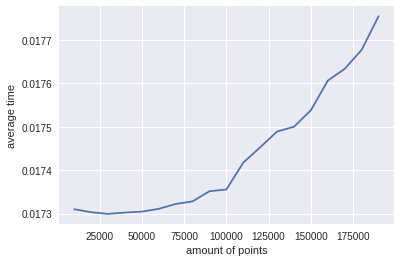

check with O(n^2):


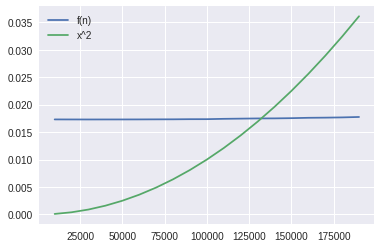

In [143]:
dimension = 2
amounts_of_points = range(int(1e4), 2*int(1e5), int(1e4))
average_times = []
for amount_of_points in amounts_of_points:
  average_time = compute_average_time(amount_of_points, dimension, kd_tree_search, build_kd_tree)
  if amount_of_points % 1e4 == 0:
    print "amount of points = {}, average 2D search time = {}s seconds".format(amount_of_points, round(average_time, 5))
  average_times.append(average_time)
plt.plot(amounts_of_points, average_times, label = 'f(n)')
plt.xlabel('amount of points')
plt.ylabel('average time')
plt.show()
print "check with O(n^2):"
plt.plot(amounts_of_points, average_times, label = 'f(n)')
plt.plot(amounts_of_points, map(lambda x : (x/1e6)**(2), amounts_of_points), label = 'x^2')
plt.legend()
plt.show()

dimension of problem = 10, time = 0.01751s seconds
dimension of problem = 20, time = 0.01746s seconds
dimension of problem = 30, time = 0.01744s seconds
dimension of problem = 40, time = 0.01743s seconds
dimension of problem = 50, time = 0.01744s seconds
dimension of problem = 60, time = 0.01745s seconds
dimension of problem = 70, time = 0.01748s seconds
dimension of problem = 80, time = 0.01749s seconds
dimension of problem = 90, time = 0.01757s seconds
dimension of problem = 100, time = 0.01765s seconds
dimension of problem = 110, time = 0.01772s seconds
dimension of problem = 120, time = 0.01782s seconds
dimension of problem = 130, time = 0.01795s seconds
dimension of problem = 140, time = 0.01805s seconds
dimension of problem = 150, time = 0.01818s seconds
dimension of problem = 160, time = 0.01836s seconds
dimension of problem = 170, time = 0.01857s seconds
dimension of problem = 180, time = 0.01874s seconds
dimension of problem = 190, time = 0.01884s seconds


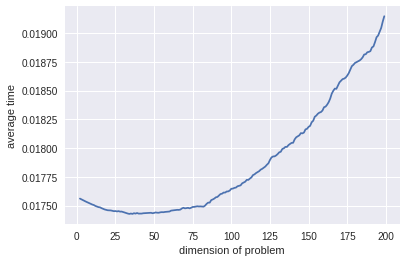

In [148]:
dimensions = range(2, 200)
amount_of_points = int(1e4)
average_times = []
for dimension in dimensions:
  average_time = compute_average_time(amount_of_points, dimension, kd_tree_search, build_kd_tree)
  if dimension % 10 == 0:
    print "dimension of problem = {}, time = {}s seconds".format(dimension, round(average_time, 5))
  average_times.append(average_time)
plt.plot(dimensions, average_times)
plt.xlabel('dimension of problem')
plt.ylabel('average time')
plt.show()

In [192]:
dimensions = range(2, 100, 5)
amounts_of_points = range(int(1e3), 2*int(1e4), int(1e3))

start_time = time.time()
result = np.array([[compute_average_time(amount_of_points, dimension, kd_tree_search, build_kd_tree) for amount_of_points in amounts_of_points] for dimension in dimensions])
print '{}s seconds'.format(round(time.time() - start_time, 3))
print 'the end'    

144.975s seconds
the end


In [0]:
result = result.reshape((len(dimensions), len(amounts_of_points)))
dimensions, amounts_of_points = np.meshgrid(amounts_of_points, dimensions)

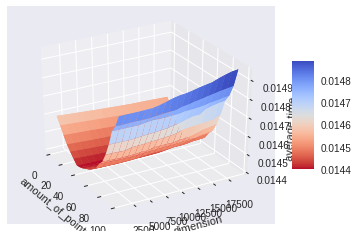

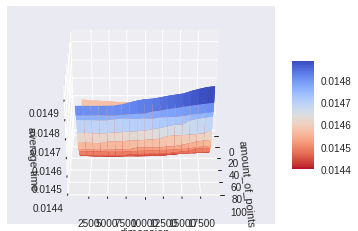

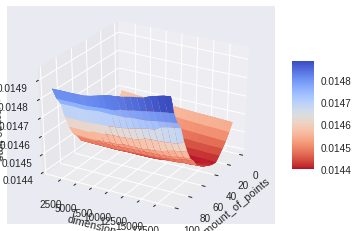

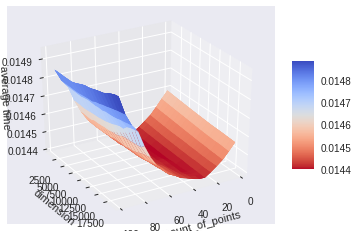

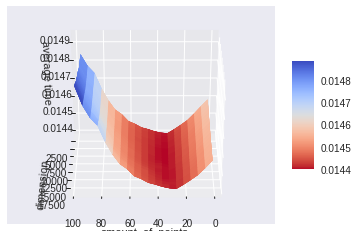

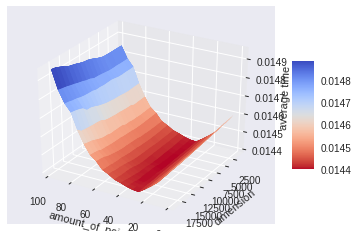

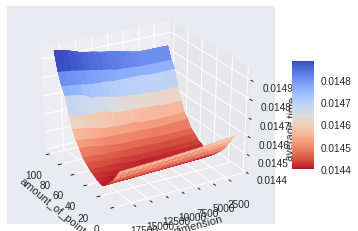

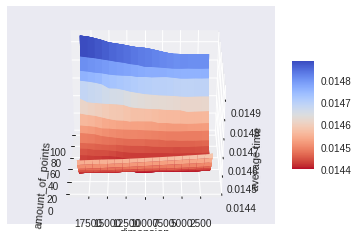

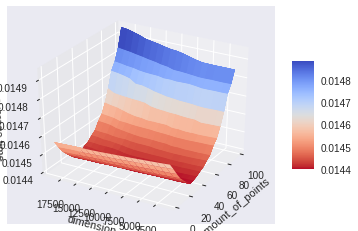

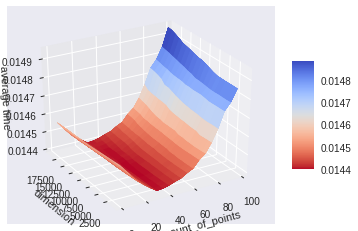

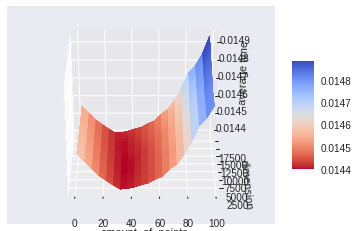

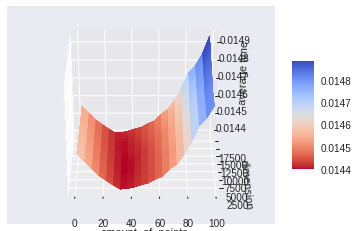

In [194]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('amount_of_points')
ax.set_ylabel('dimension')
ax.set_zlabel('average time')
surf = ax.plot_surface(amounts_of_points, dimensions, result, cmap = cm.coolwarm_r)
fig.colorbar(surf, shrink=0.5, aspect=5)
for angle in range(-30, 300, 30):
  ax.view_init(30, angle)
  surf = ax.plot_surface(amounts_of_points, dimensions, result, cmap = cm.coolwarm_r)
  display.display(plt.gcf()) 
#   time.sleep(1)
#   display.clear_output(wait=True)

### Conclusion:
The graphics confirm the theoretical $O(nlogn)$ dependence.  So, a query with an orthogonal search in a Kd-tree storing $n$ points can be performed in $O(n^{1-\frac{1}{k}} + c)$, where $c$ - is the number of reported points. 